<center><h1>QBUS6860 - Visual Data Analytics</h1></center>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Loading the data with pandas


Before we load the data into the pd.dataframe, let's recall the function <code>pd.read_csv()</code> and see some new arguments of it. 

<code>pandas.read_csv(filepath_or_buffer, index_column, na_value=[''])</code>

**Parameters**
- **filepath_or_buffer**: str, path object or file-like object
    Any valid string path is acceptable. The string could be a URL. Valid URL schemes include http, ftp, s3, gs, and file. For file URLs, a host is expected. A local file could be: file://localhost/path/to/table.csv.
    
- **index_col**: int, str, sequence of int / str, or False, optional, default None
    Column(s) to use as the row labels of the DataFrame, either given as string name or column index. If a sequence of int / str is given, a MultiIndex is used.

- **na_values** scalar, str, list-like, or dict, optional
    Additional strings to recognize as NA/NaN. If dict passed, specific per-column NA values. By default the following values are interpreted as NaN: ‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘NA’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, ‘n/a’, ‘nan’, ‘null’.




In [2]:
df=pd.read_csv('finset.csv')

#check data, which loaded
#short option check: print first xx rows of data
df.head()

,sector,marketcap,anrevenue,size,roi
0,telecom,12,1.0,250,8
1,telecom,18,1.5,5000,5
2,manufacturing,60,2.0,5000,9
3,retail,20,3.0,50,10
4,retail,25,2.0,250,11


In [3]:
#more detailed check
credit_data = pd.read_csv('finset.csv',index_col=0,na_values=["??","????"])
#unfortunately in this dataset no "??" or "????" data, so this example is just to 
#show the function to get replacement for some irregular values
credit_data

,marketcap,anrevenue,size,roi
sector,,,,
telecom,12,1.0,250,8
telecom,18,1.5,5000,5
manufacturing,60,2.0,5000,9
retail,20,3.0,50,10
retail,25,2.0,250,11
...,...,...,...,...
manufacturing,62,10.0,5000,12
manufacturing,67,9.0,5000,12
manufacturing,58,9.5,5000,13


Why we need add a scalar or list for nan values here? 

As you can see the arguments, the na_value contain many default nan value setting. But if your dataset contain some nan values but not in the default setting list, you may add them into na_values arguments to make pandas can recognize it. 

## Step 1: Distinguish Attributes of the Dataset 

Let's check the shape of the dataset

We have total 99 rows and 5 columns and seems good, but if you look at the dataframe, we 

In [4]:
# Learn the shape of the dataset
df.shape #no "()"
# you can see here the shape of the dataset is the (99, 5) 
# which means we have 99 rows and 5 columns in dataset 'FINSET'

(99, 5)

<code>DataFrame.shape()</code>
can only show the basic dimensional information. 

If you want to get more like data type etc.you may apply:
<code>DataFrame.info()</code>
- Print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [5]:
#learn columns and their data types
df.info()
# 99 entries: 99 observations/rows, start from 0 to 98
# no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sector     99 non-null     object 
 1   marketcap  99 non-null     int64  
 2   anrevenue  99 non-null     float64
 3   size       99 non-null     int64  
 4   roi        99 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.0+ KB


One column has categorical data and all the other columns are of the numeric type with non-Null entries

Let us get quick statistical summary (missing values are automatically skipped)

In [6]:
df.describe() #only return the values related to numerical data

,marketcap,anrevenue,size,roi
count,99.000000,99.000000,99.000000,99.000000
mean,38.707071,5.172727,3398.484848,10.080808
std,23.904253,4.356108,2276.997380,9.383743
min,2.000000,0.200000,50.000000,1.000000
25%,14.000000,1.500000,250.000000,4.000000
50%,43.000000,3.000000,5000.000000,9.000000
75%,60.000000,9.050000,5000.000000,12.000000
max,78.000000,14.800000,5000.000000,61.000000


In [7]:
df.describe().applymap("{:,.4f}".format) #change decimal places #additional notes by Yuning

,marketcap,anrevenue,size,roi
count,99.0000,99.0000,99.0000,99.0000
mean,38.7071,5.1727,"3,398.4848",10.0808
std,23.9043,4.3561,"2,276.9974",9.3837
min,2.0000,0.2000,50.0000,1.0000
25%,14.0000,1.5000,250.0000,4.0000
50%,43.0000,3.0000,"5,000.0000",9.0000
75%,60.0000,9.0500,"5,000.0000",12.0000
max,78.0000,14.8000,"5,000.0000",61.0000


## Step 2: Univariate Analysis

### 1) Check for duplicates  


We can apply <code>DataFrame.drop_duplicates(subset=None, keep='first')</code> to drop some duplicated values.

**Parameters**
- **subset**: column label or sequence of labels, optional
Only consider certain columns for identifying duplicates, by default use all of the columns.
- **keep{‘first’, ‘last’, False}** default ‘first’
Determines which duplicates (if any) to keep. - first : Drop duplicates except for the first occurrence. - last : Drop duplicates except for the last occurrence. - False : Drop all duplicates.

For example, in our dataframe, we have sector which only have three unique values "*telecom, manufacturing, retail*". Try if we can only keep three first unique values and drop all others.

In [8]:
data = df.drop_duplicates(subset ="sector")
data

,sector,marketcap,anrevenue,size,roi
0,telecom,12,1.0,250,8
2,manufacturing,60,2.0,5000,9
3,retail,20,3.0,50,10


There are only three unique sectors in our dataset. But how many repeated value of those three sectors? Then we can apply the <code>.value_counts()</code> function to check the numbers of counts. 

### 2) Print the count of values for each sector
<code>DataFrame.value_counts(subset=None, normalize=False, sort=True, ascending=False, dropna=True)</code>

check the document page for more information https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html

In this case, we specify the <code>subset='sector'</code> to count how many rows in specific '**sector**'. For example, in **manufacturing**, it has total 52 rows that contains manufacturing under **sector**

In [9]:
df.value_counts("sector")

sector
manufacturing    52
telecom          25
retail           22
Name: count, dtype: int64

Recall from last week lecture, we now have different sectors counts under single norminal variable "sectors". We then need to apply the bar plot to represent information of this. 

### 3) Create plot of individual feature count

<code>seaborn.countplot(data=None, x=None)</code>

A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for <code>barplot()</code>, so you can compare counts across nested variables.


**Parameters**:

- **data** DataFrame, array, or list of arrays, optional Dataset for plotting. If x and y are absent, this is interpreted as wide-form. Otherwise it is expected to be long-form.

- **x, y** huenames of variables in data or vector data, optional Inputs for plotting long-form data. See examples for interpretation.

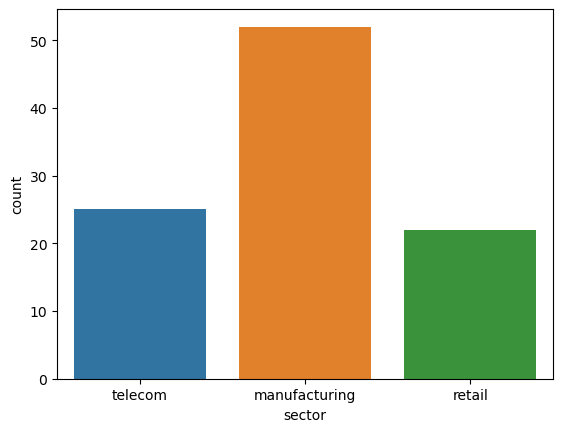

In [10]:
sns.countplot(x='sector', data=df, )
plt.show()

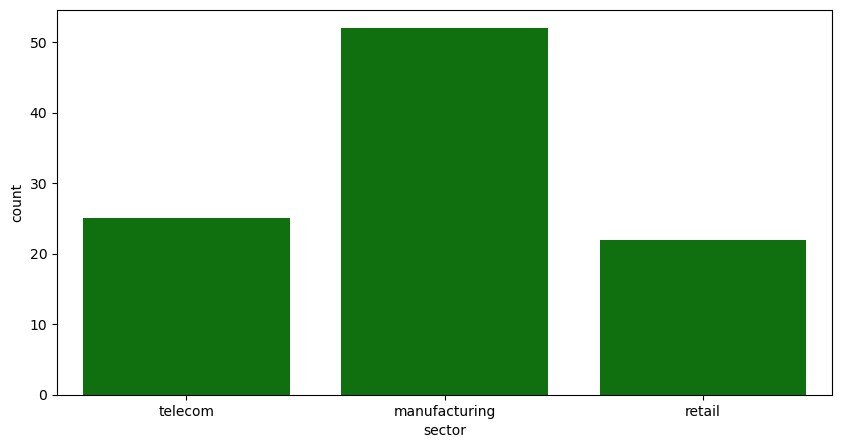

In [11]:
# additional notes by Yuning

plt.figure(figsize=(10,5))
sns.countplot(x='sector', data=df,color='green') 
# x axis is based on the column sector of df (loaded dataset in the fist step)
# I changed the colors all to green 
# because I dont want to involve colors without any additional infomation
plt.show()
# plt.savefig('Result01.png') 

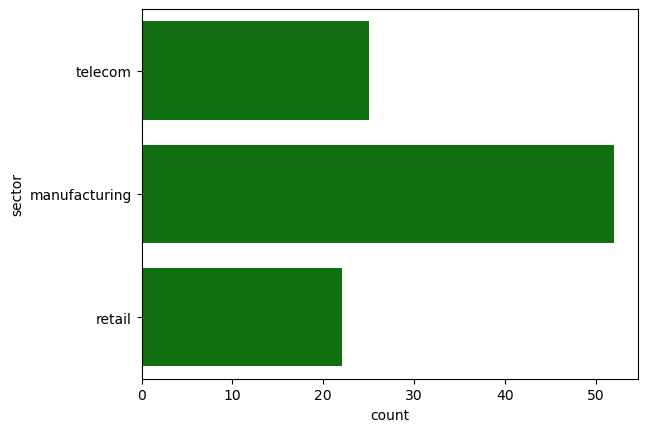

In [12]:
# additional notes by Yuning
sns.countplot(y='sector', data=df, color="green") 
plt.show()

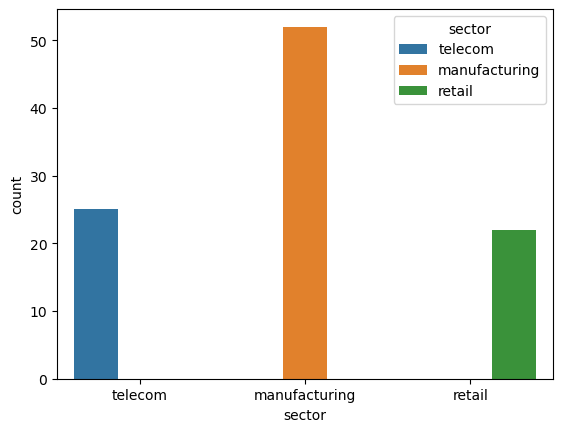

In [13]:
# additional notes by Yuning

#legend
sns.countplot(x='sector', data=df, hue = "sector") 
plt.show()
# tbh no legend is needed... just show you how to add legend

### 4) Plot value distributions for each individual feature  


Remeber how many columns we have in dataframes. If you forget that, we may use <code>DataFrame.info()</code>, and you will know there are four columns(variables). 

In next step, we need to draw four variables data distrbutions in four subplots. 

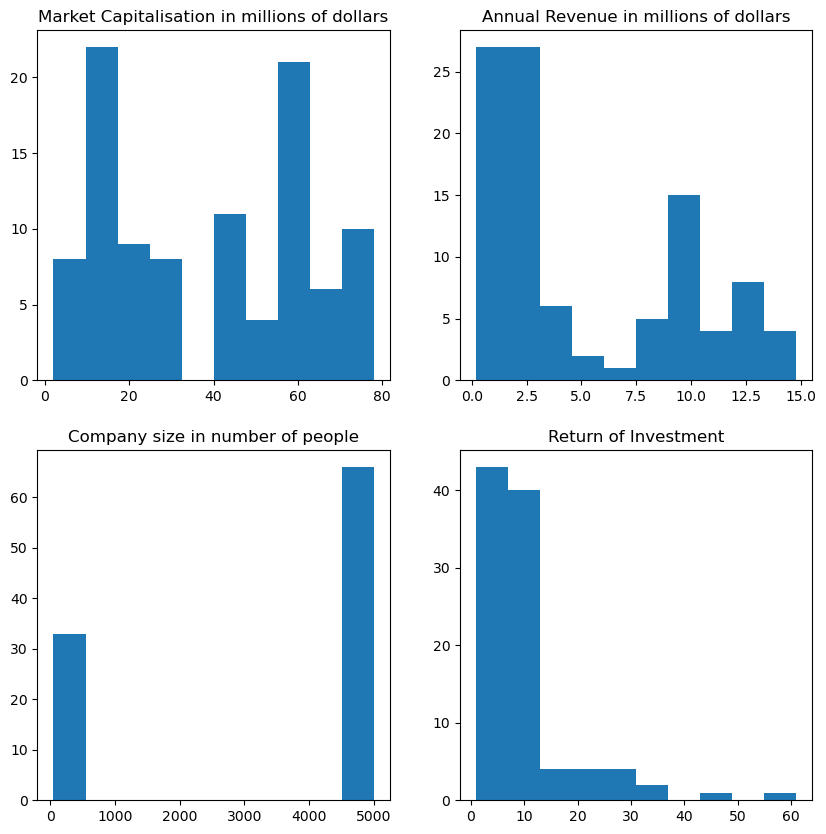

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
  
# create fig and axes objects for four subplots.  
fig, axes = plt.subplots(2, 2, figsize=(10,10))
  
axes[0,0].set_title("Market Capitalisation in millions of dollars")
axes[0,0].hist(df['marketcap'], bins=10);
  
axes[0,1].set_title("Annual Revenue in millions of dollars")
axes[0,1].hist(df['anrevenue'], bins=10);
  
axes[1,0].set_title("Company size in number of people")
axes[1,0].hist(df['size'], bins=10);
  
# Add your code to show ROI in percent plot
axes[1,1].set_title('Return of Investment')
axes[1,1].hist(df['roi'], bins=10)

plt.show()

Figure(1000x1000) [[<Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: >]]


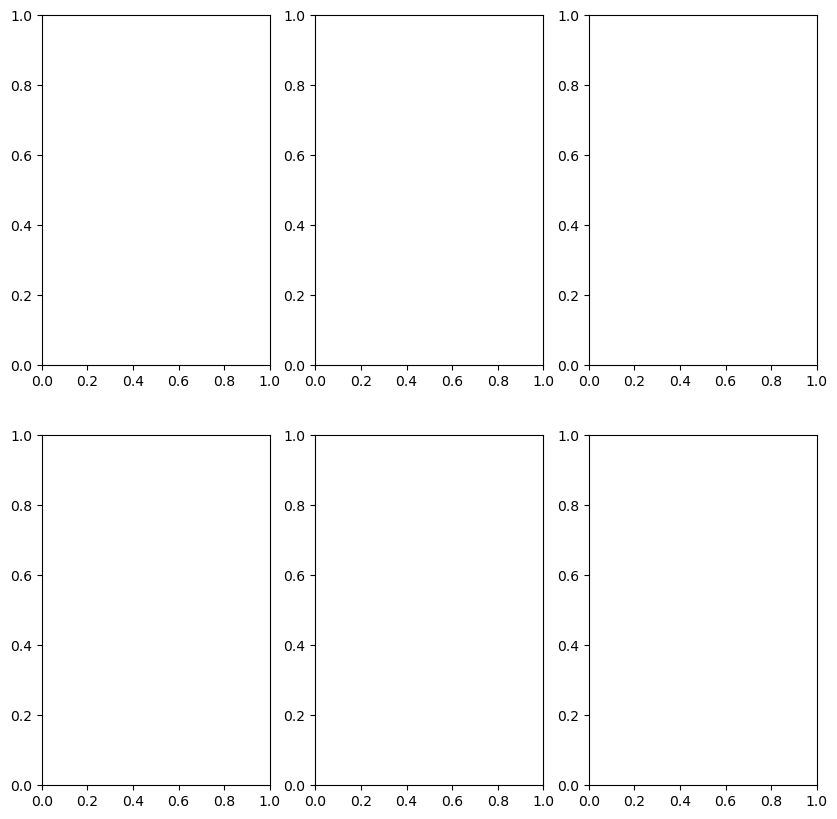

In [15]:
# just a process to show the code step by step
fig, axes = plt.subplots(2, 3, figsize=(10,10)) # 2 rows x 3 columns plots

print(fig, axes)  # you can check what is the object 'fig' and 'axes'
  

Now, we can see each variables distribution. But remember, the dataframe we have is long format we need show our plot in **third dimensions**. In next we are going to show our plot by using colors to represent third dimensions of datas. 

### 5) Plot each individual feature (colour based on corresponding sector)


To create subplots with colors is not easy job in matplotlib, so we are going to use <code>class seaborn.FacetGrid(data, *, row=None, col=None, hue=None)</code> to create subbplot with colors. 

<code>class seaborn.FacetGrid(data, *, row=None, col=None, hue=None)</code>
**\__init**__\(data, *, row=None, col=None, hue=None)

**Parameters**:

- **data** DataFrame Tidy (“long-form”) dataframe where each column is a variable and each row is an observation.

- **row, col, hue** strings Variables that define subsets of the data, which will be drawn on separate facets in the grid. See the {var}_order parameters to control the order of levels of this variable.

Remember, this <code>seaborn.FaceGrid()</code> is a <code><font color=red>class</font></code>. When you want to use it, you must create a instance for this class at first. For example,  <code>plot = sns.FacetGrid(df, hue='sectors')</code> the instance 'plot' was created by <code>sns.FaceGrid</code>

If you want to know more about python advance usage of <code>class</code>, you may refer to the link https://docs.python.org/3/tutorial/classes.html 

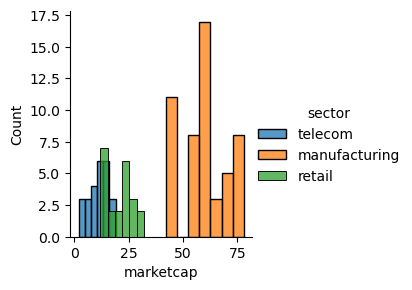

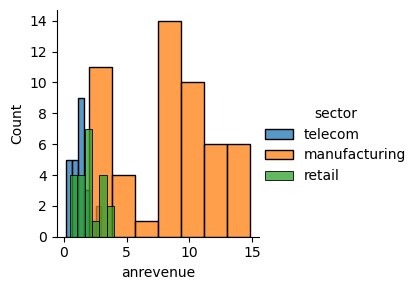

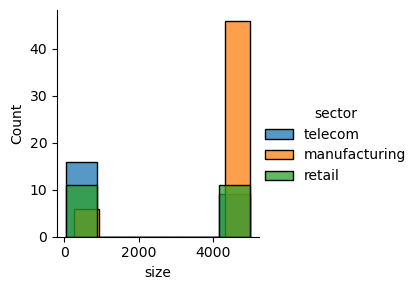

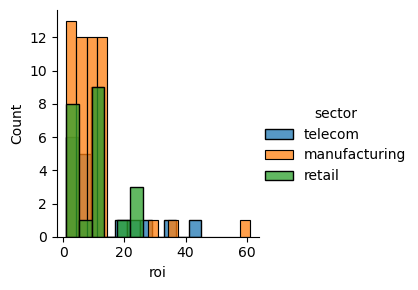

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
  
plot = sns.FacetGrid(df, hue="sector")

# plot = sns.FacetGrid(df, col="sector")

plot.map(sns.histplot, "marketcap").add_legend()
  
plot = sns.FacetGrid(df, hue="sector")
plot.map(sns.histplot, "anrevenue").add_legend()
  
plot = sns.FacetGrid(df, hue="sector")
plot.map(sns.histplot, "size").add_legend()
  
plot = sns.FacetGrid(df, hue="sector")
plot.map(sns.histplot, "roi").add_legend()
  
plt.show()
#plt.savefig('Result03.png')

**Yuning's comment:** In general, the telecommunication sector has the lowest market share. 
Similarly in annual revenue, telecommunication sector has created the least revenue.
For the size, almost all the manufacturing has the size over 4000, no values in all the sectors locate within 2000 to 4000. 
For return of investment (ROI), most of the manufacturing sector companies have the lowest ROI. 
(maybe you can also try to explain those based on your domain knowledge or with some references, just give the numbers meanings in the real industrial world...) It makes sense coz manufacturing sector is very mature and not very big potential to have some new development...

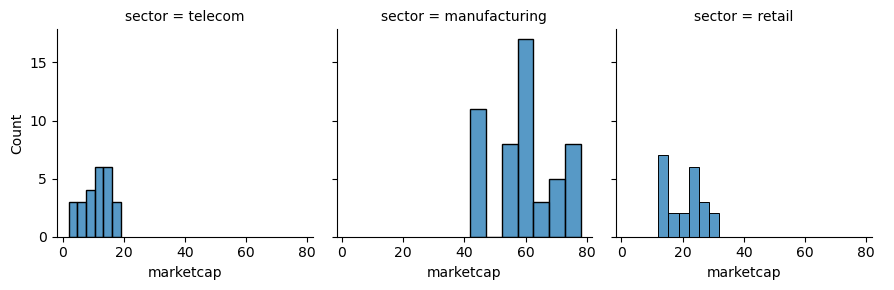

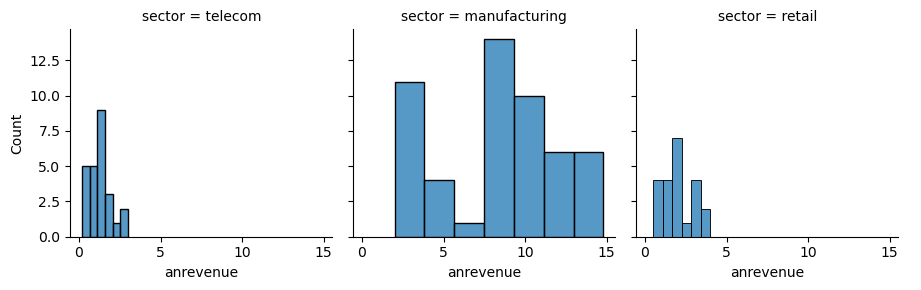

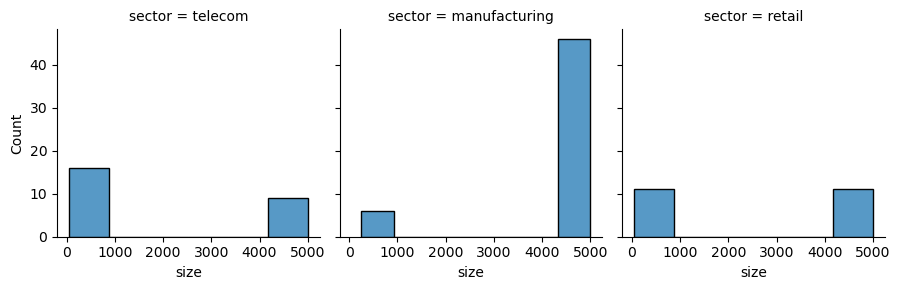

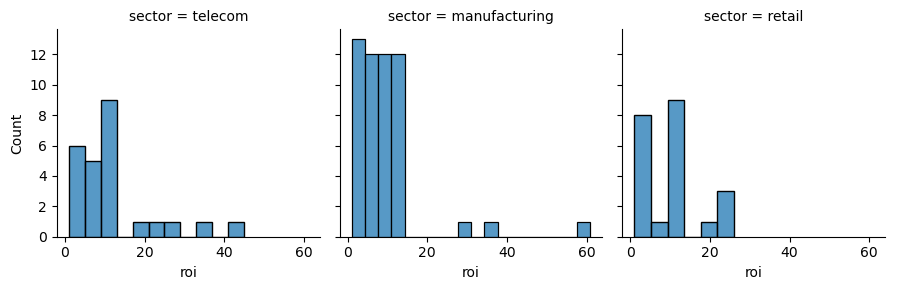

In [17]:
# additional notes by Yuning
plot = sns.FacetGrid(df, col="sector")
plot.map(sns.histplot, "marketcap").add_legend()
  
plot = sns.FacetGrid(df, col="sector")
plot.map(sns.histplot, "anrevenue").add_legend()
  
plot = sns.FacetGrid(df, col="sector")
plot.map(sns.histplot, "size").add_legend()
  
plot = sns.FacetGrid(df, col="sector")
plot.map(sns.histplot, "roi").add_legend()
  
plt.show()

### 6) Add distributions to plots (colour based on corresponding sector)

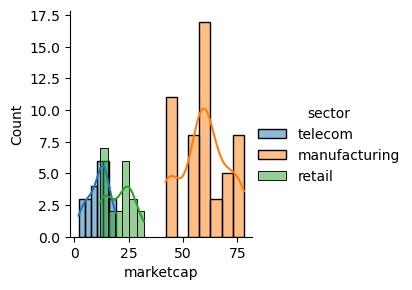

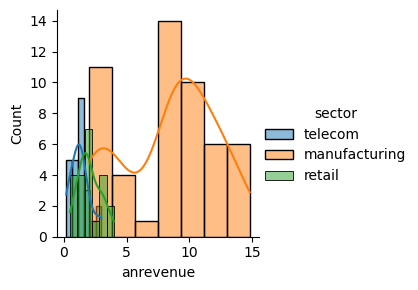

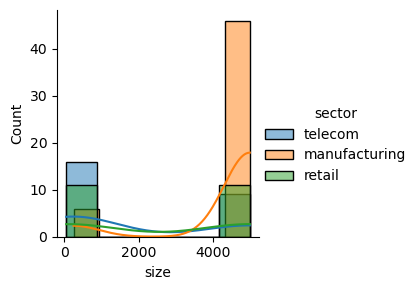

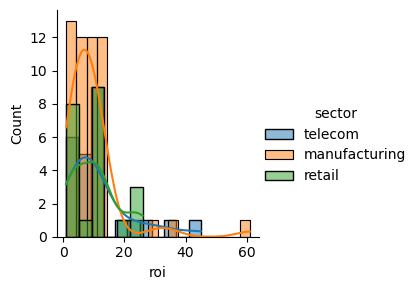

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
  
plot = sns.FacetGrid(df, hue="sector")
plot.map(sns.histplot, "marketcap", kde=True).add_legend()
  
plot = sns.FacetGrid(df, hue="sector")
plot.map(sns.histplot, "anrevenue", kde=True).add_legend()
  
plot = sns.FacetGrid(df, hue="sector")
plot.map(sns.histplot, "size", kde=True).add_legend()
  
# Try to do this for ROI in percent
plot = sns.FacetGrid(df, hue="sector")
plot.map(sns.histplot, "roi", kde=True).add_legend()

plt.show()
#plt.savefig('Result04.png')

## Step 3: Detect Interactions Among Attributes (Bivariate Analysis)

#### a) compare market capitalisation and annual revenue

<code>seaborn.scatterplot(data=None, x=None, y=None, hue=None)</code>

**Parameters:**

- **data**: pandas.DataFrame, numpy.ndarray, mapping, or sequence Input data structure. Either a long-form collection of vectors that can be assigned to named variables or a wide-form dataset that will be internally reshaped.

- **x, y**: vectors or keys in data Variables that specify positions on the x and y axes.

- **hue**： vector or key in data Grouping variable that will produce points with different colors. Can be either categorical or numeric, although color mapping will behave differently in latter case.

<code>matplotlib.pyplot.legend(*args, **kwargs)</code>

**Other Parameters:**

- **loc**: str or pair of floats. 

| Location String | Location Code |
| :---: | :---: |
| 'best' (Axes only) | 0 |
| 'lower left' | 1 |
| 'lower right' | 2 |
| 'upper left' | 3 |
| 'upper right' | 4 |
| 'right' | 5 |
| 'center left' | 6 |
| 'center right' | 7 |
| 'lower center' | 8 |
| 'upper center' | 9 |
|'center' | 10 | 

- **bbox_to_anchor** BboxBase, 2-tuple, or 4-tuple of floats Box that is used to position the legend in conjunction with loc. Defaults to axes.bbox (if called as a method to Axes.legend) or figure.bbox (if Figure.legend). This argument allows arbitrary placement of the legend.

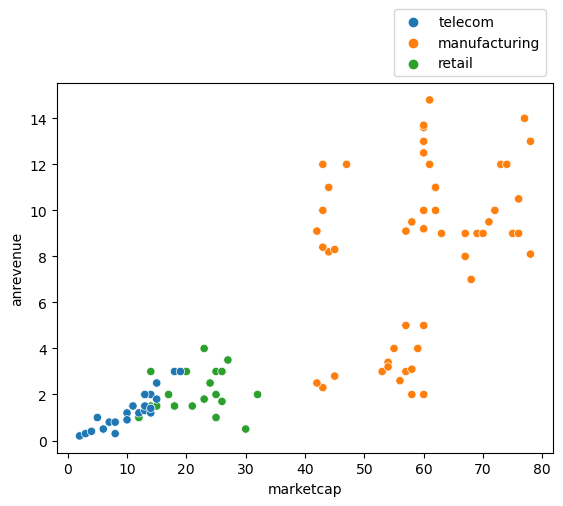

In [19]:
sns.scatterplot(x='marketcap', y='anrevenue',
                hue='sector', data=df, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=4)
#change the space between the legend box and figure box/location of legend
    
plt.show()

Telecom has the smallest market cap and annual revenue

Retail lies in the middle of the other two sectors in terms of marketcap and revenue

Manufacturing has the largest marketcap and annualrevenue

**Yuning's comments**: 

Telecom has the smallest market cap and annual revenue. Also significant positive linear relationship.

Retail lies in the middle of the other two sectors in terms of marketcap and revenue. moderate postive LR.

For manufacturing, maybe no LR.

#### b) compare annual revenue and size


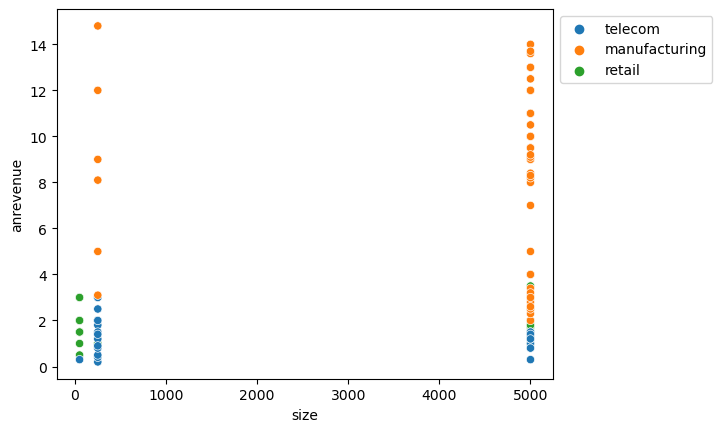

In [20]:
sns.scatterplot(x='size', y='anrevenue',
                hue='sector', data=df, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  

Retail has the smallest size and annual revenue

Telecom lies in-between the two sectors

Manufacturing tends to have mid and large size companies with relatively high annual revenue

**Yuning**: As we only have servals levels of size of company, e.g. 50, 250, 5000. Thus we will have the scatterplot like this. Many companies are considered as same size level. 


#### c) compare annual revenue and roi 

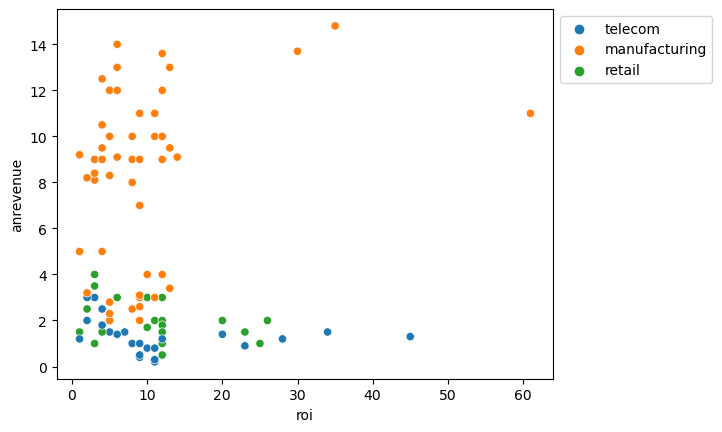

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
  
  
sns.scatterplot(x='roi', y='anrevenue',
                hue='sector', data=df, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()
#plt.savefig('Result07.png') 

No particular pattern emerges from the aove graph: no obvious relation between roi and annual revenue

## Step 4: Detect Missing Values

In [22]:
df.isnull().sum()

sector       0
marketcap    0
anrevenue    0
size         0
roi          0
dtype: int64

No column has any missing values

## Step 5: Detect Outliers

### 1) Create box plots by sector

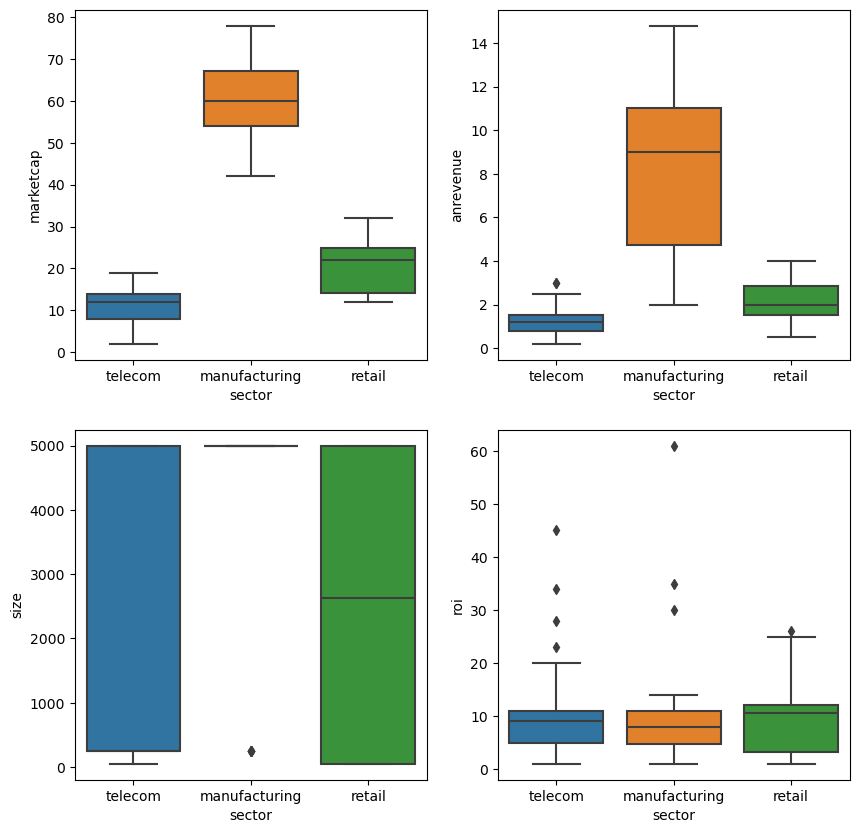

In [23]:
def graph(y):
    return sns.boxplot(x="sector", y=y, data=df)
  
plt.figure(figsize=(10,10))
      
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('marketcap')
  
plt.subplot(222)
graph('anrevenue')
  
plt.subplot(223)
graph('size')
  
plt.subplot(224)
graph('roi')
  
plt.show()

* Telecom companies have the smallest revenue and tend to have smaller market caps
* Retail companies have medium revenue and market caps
* Manufacturing businesses have largest revenue and market caps

An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects.  They can be caused by measurement or execution errors.

### 2) Create box plots for ROI variable

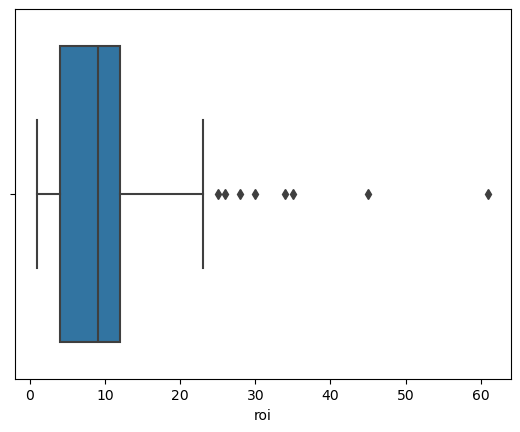

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
  
# Load the dataset
df=pd.read_csv('finset.csv')
  
sns.boxplot(x='roi', data=df)
plt.show()


Values above 22 are outliers. Let's remove them for further analysis. We will use interquartile range method to remove them


### 2) Remove outliers

<code>numpy.percentile(a, q, axis=None, out=None, overwrite_input=False, method='linear', keepdims=False, *, interpolation=None)</code>

https://numpy.org/doc/stable/reference/generated/numpy.percentile.html

Compute the q-th percentile of the data along the specified axis.

**a: array_like**

Input array or object that can be converted to an array.

**q: array_like of float**

Percentile or sequence of percentiles to compute, which must be between 0 and 100 inclusive.

Old Shape:  (99, 5)
New Shape:  (87, 5)


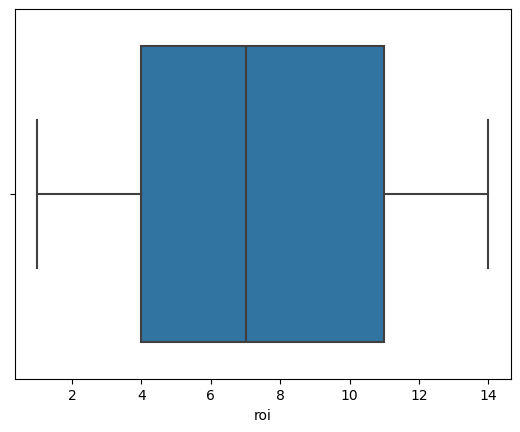

In [25]:
import sklearn
import pandas as pd
import seaborn as sns
import numpy as np
  
# Load the dataset
df = pd.read_csv('finset.csv')
  
# IQR
Q1 = np.percentile(df['roi'], 25, interpolation = 'midpoint')
  
Q3 = np.percentile(df['roi'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1
  
print("Old Shape: ", df.shape)
  
# Upper bound
upper = np.where(df['roi'] >= (Q3 + 1 * IQR))
  
# Lower bound
lower = np.where(df['roi'] <= (Q1 - 1 * IQR))

# print out the upper and lower
# lower
# upper

# Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
  
print("New Shape: ", df.shape)
  
sns.boxplot(x='roi', data=df)
plt.show()



**Success! we have removed outliers**



## Step 6: Feature Engineering

Regression analysis

<code>seaborn.regplot(*, x=None, y=None, ..., line_kws=None, ...)</code>

https://seaborn.pydata.org/generated/seaborn.regplot.html

Plot data and a linear regression model fit.

**{scatter,line}_kws: dictionaries**

Additional keyword arguments to pass to plt.scatter and plt.plot.

For example here, line_kws = {'color', 'alpha', 'lw'}
- 'color' is the kwarg for regression line's color
- 'alpha' is the kwarg for transparency of line
- 'lw' is the kwarg for line thickness


### a) Correlation between market cap and annual revenue

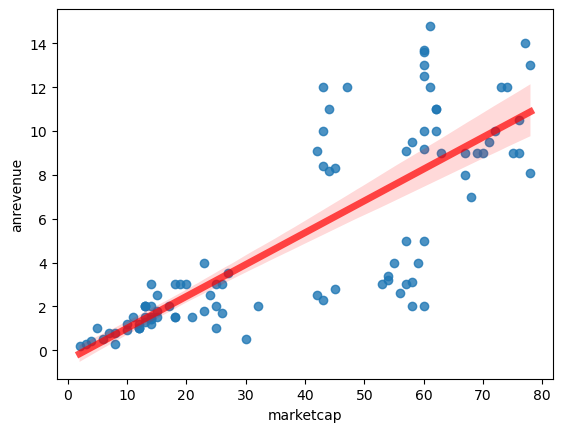

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('finset.csv')

sns.regplot(x=df["marketcap"],y=df["anrevenue"],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()
#plt.savefig('Result13.png')

### b) Correlation between annual revenue and roi

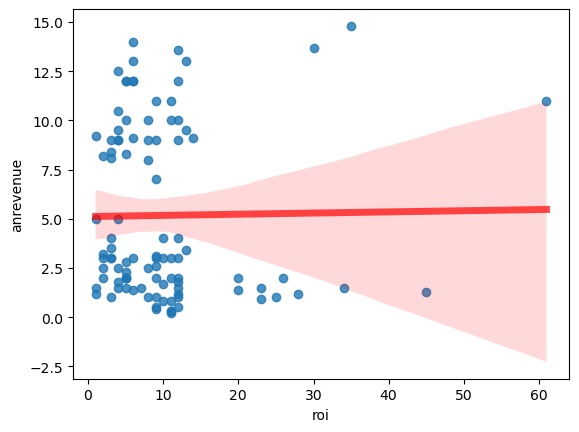

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('finset.csv')

sns.regplot(x=df["roi"],y=df["anrevenue"],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

#plt.savefig('Result14.png')

### c) Correlation between annual revenue and size

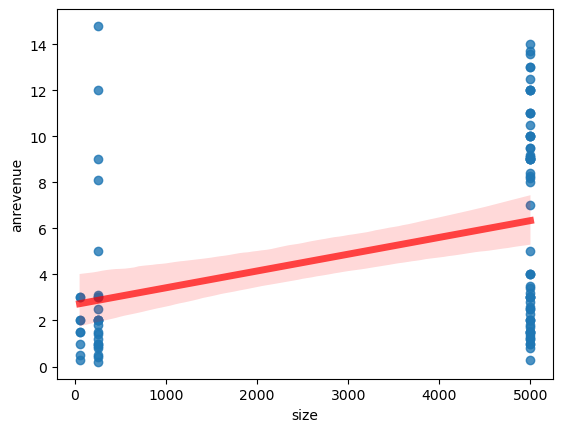

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('finset.csv')

sns.regplot(x=df["size"],y=df["anrevenue"],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

#plt.savefig('Result15.png')

### d) Correlation between market cap and roi

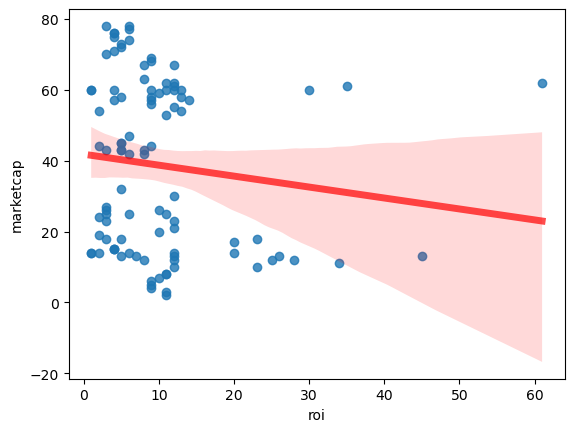

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('finset.csv')

sns.regplot(x=df["roi"],y=df["marketcap"],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()
#plt.savefig('Result16.png')

### e) Correlation between roi and size

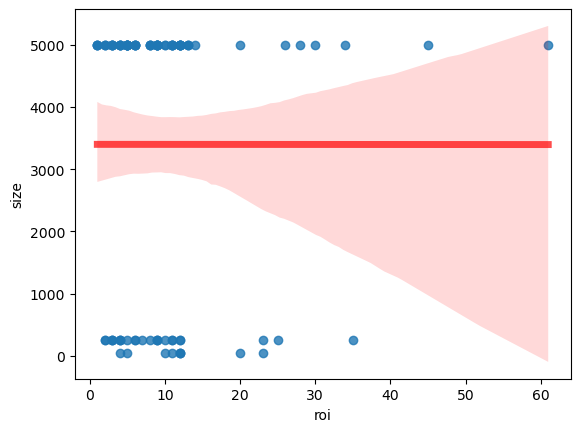

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('finset.csv')

sns.regplot(x=df["roi"],y=df["size"],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

#plt.savefig('Result17.png')

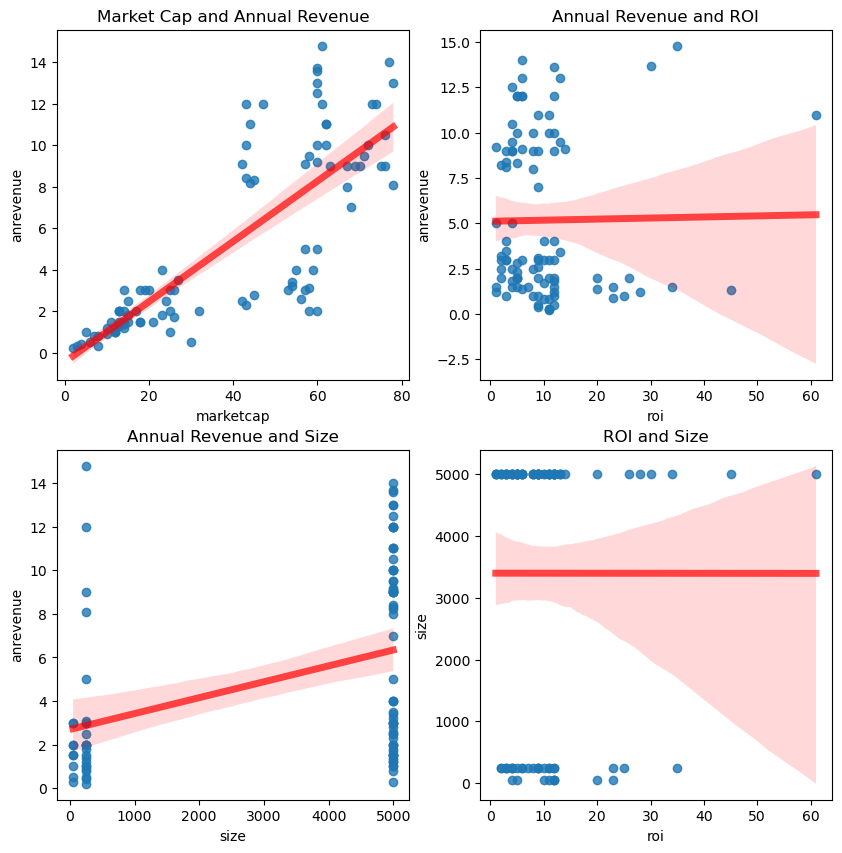

In [31]:
# additional notes: plot them together - Ruikun 
fig, axes = plt.subplots(2,2, figsize=(10,10))

sns.regplot(
    x=df["marketcap"],
    y=df["anrevenue"],
    line_kws={"color":"r","alpha":0.7,"lw":5},
    ax=axes[0,0]
)
axes[0, 0].set_title('Market Cap and Annual Revenue')

sns.regplot(
    x=df["roi"],
    y=df["anrevenue"],
    line_kws={"color":"r","alpha":0.7,"lw":5},
    ax=axes[0,1]
)
axes[0,1].set_title('Annual Revenue and ROI')

sns.regplot(
    x=df["size"],
    y=df["anrevenue"],
    line_kws={"color":"r","alpha":0.7,"lw":5},
    ax=axes[1,0]
)
axes[1,0].set_title('Annual Revenue and Size')

sns.regplot(
    x=df["roi"],
    y=df["size"],
    line_kws={"color":"r","alpha":0.7,"lw":5},
    ax=axes[1,1]
)
axes[1,1].set_title('ROI and Size')


plt.show()

#### Additional notes by Yuning
Since size only takes 3 values (small, medium, large), it does not make much sense treating it as numerical variable we can plot some bubble plots

#### (a) first let's explore marketcap and annual revenue relative to company size


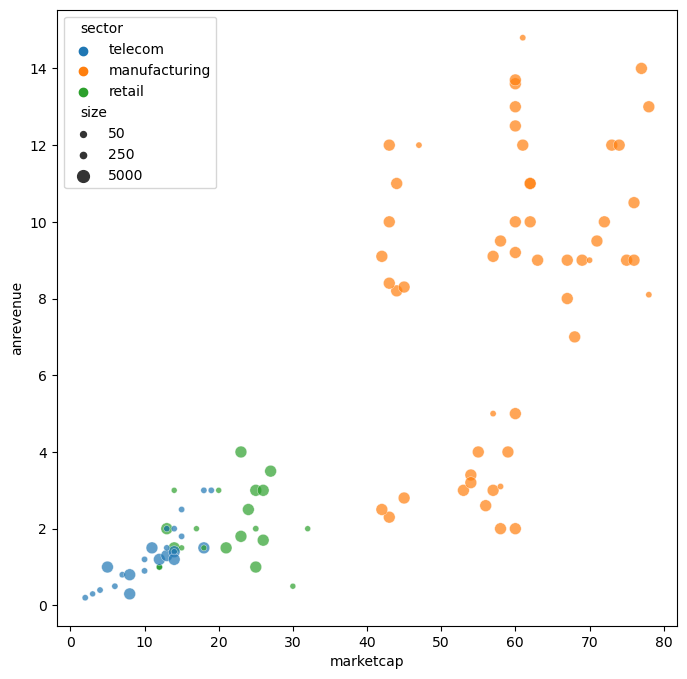

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams['figure.figsize']=[8,8]

df=pd.read_csv('finset.csv')

data=df

sns.scatterplot(data=data,x="marketcap",y="anrevenue",size="size",hue="sector", alpha=0.7)
# just add one dimension "size"
plt.show()
#plt.savefig('Result19.png')

#### (b) now let's explore marketcap and roi relative to company size

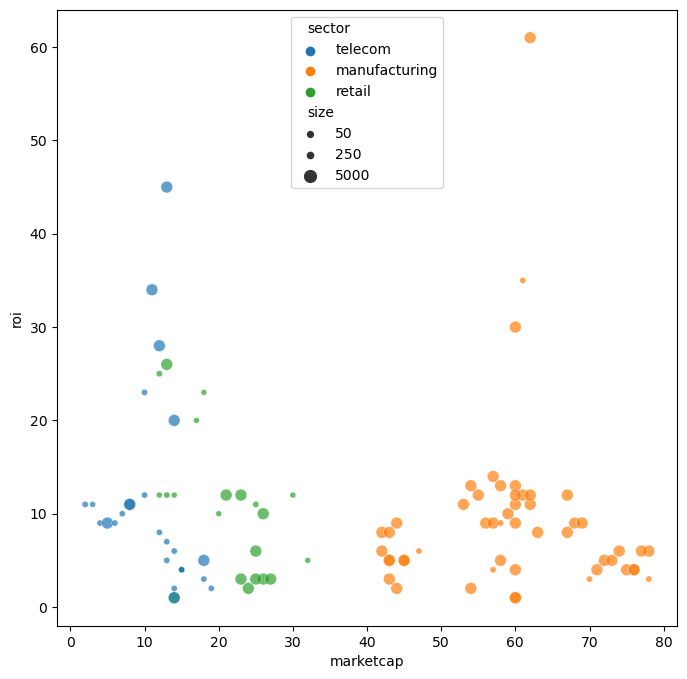

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams['figure.figsize']=[8,8]

df=pd.read_csv('finset.csv')

data=df

sns.scatterplot(data=data,x="marketcap",y="roi",size="size",hue="sector", alpha=0.7)
plt.show()
#plt.savefig('Result20.png')

#### (c) and now let's explore annual revenue and roi relative to company size

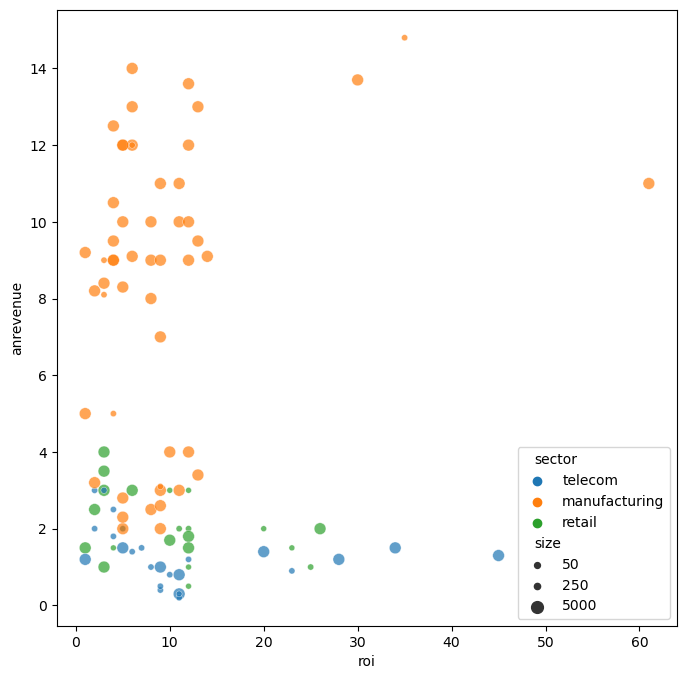

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams['figure.figsize']=[8,8]

df=pd.read_csv('finset.csv')

data=df

sns.scatterplot(data=data,x="roi",y="anrevenue",size="size",hue="sector", alpha=0.7)
plt.show()
#plt.savefig('Result21.png')

Insight: Market capitalization is positively and significantly correlated with annual revenue. 

Manufacturing companies tend to have highet market caps, annual revenues and sizes